This notebook visualizes an execution of Grover's algorithm for unstructured search on a quantum computer

## zad 1
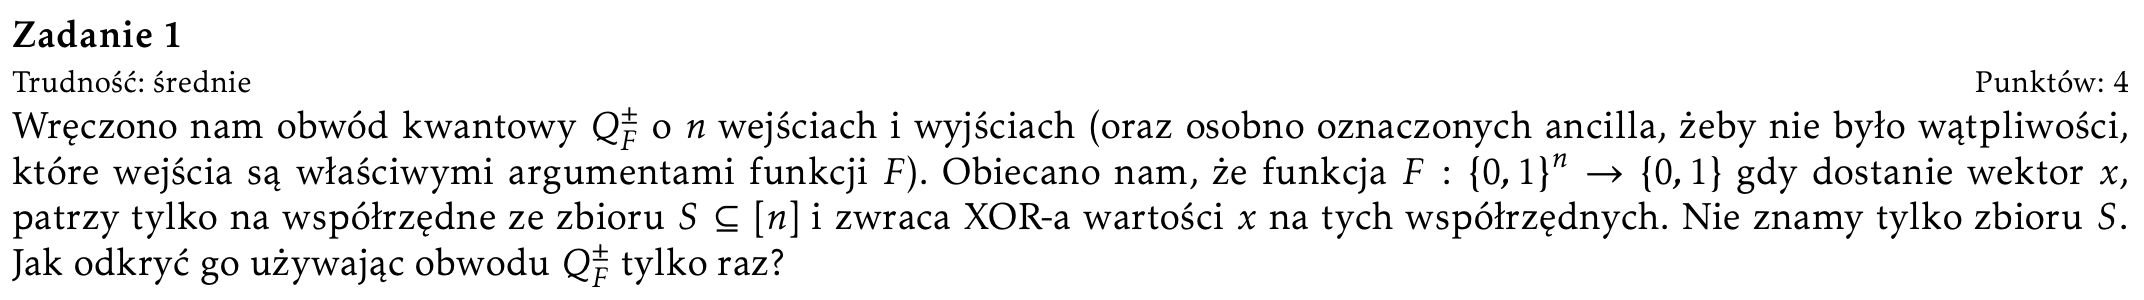

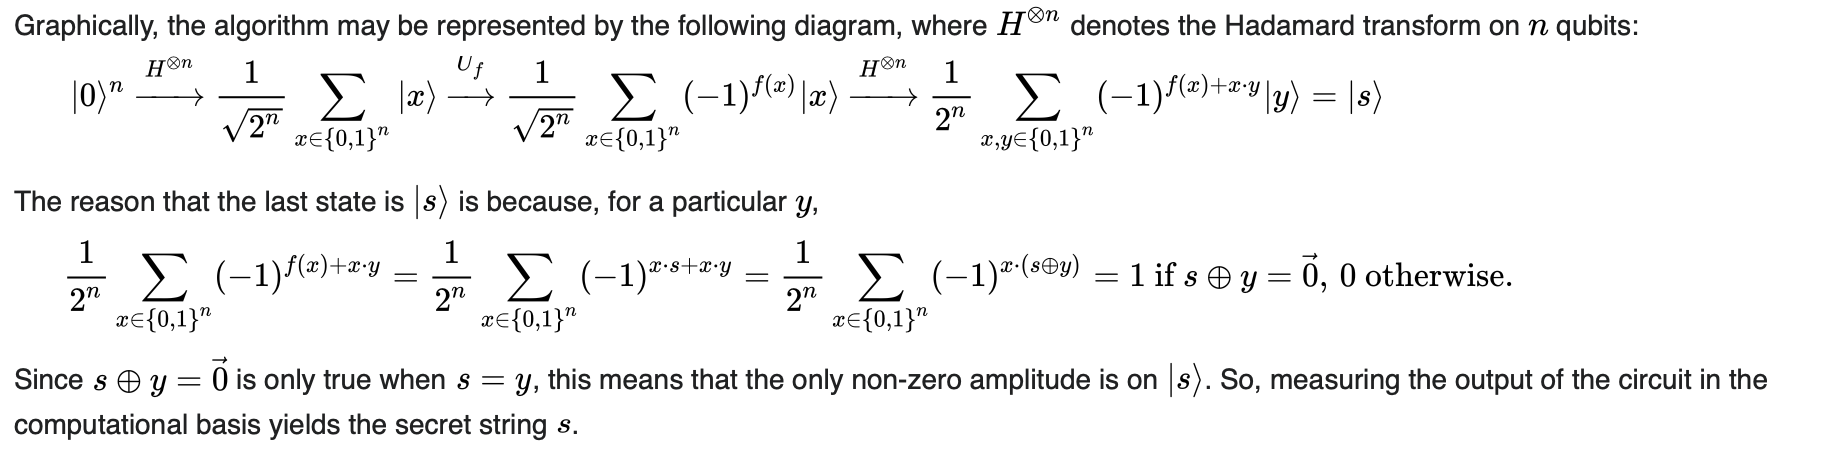

In [19]:
import numpy as np
import matplotlib.pyplot as plt

# The number of qubits involved
n = 4
# The size of the search space
N = 2**n

S = np.array([1,3])

In [54]:
def number_to_binary_array(number):
    # Convert the number to binary string without the '0b' prefix
    binary_string = bin(number)[2:]
    # Pad the binary string with zeros to ensure it has length N
    padded_binary_string = binary_string.rjust(n, '0')
    # Create a NumPy array from the padded binary string
    binary_array = np.array([int(digit) for digit in padded_binary_string])
    return binary_array

def f(x):
    binary_array = number_to_binary_array(x)
    print(binary_array)
    return binary_array[S].sum() % 2

# Of_+-
def Of(psi):
    R = np.zeros(N)
    for i in range(N):

        if (f(i) == 1):
            R[i] = - psi[i]
        else:
            R[i] = psi[i]
    return R

# Given a superposition, modeled as an array of length N, this function returns a new array which
# is the result of inversion around the average (the diffusion matrix D)
def D(psi):
    return (2*np.mean(psi) - psi)

# Create the initial state which is the result of applying the Hadamard-Walsh transformation to the zero state
def init():
    return np.ones(N)*(1/np.sqrt(N))

# Given a state, modelled as an array of length N, and an axis, plot the state
def plot(psi):
    fig = plt.figure(figsize=(30,30))
    ax = fig.add_subplot(plots+2,1,1)
    ax.set_ylim(-0.75,0.75)
    ax.bar(range(N),psi)

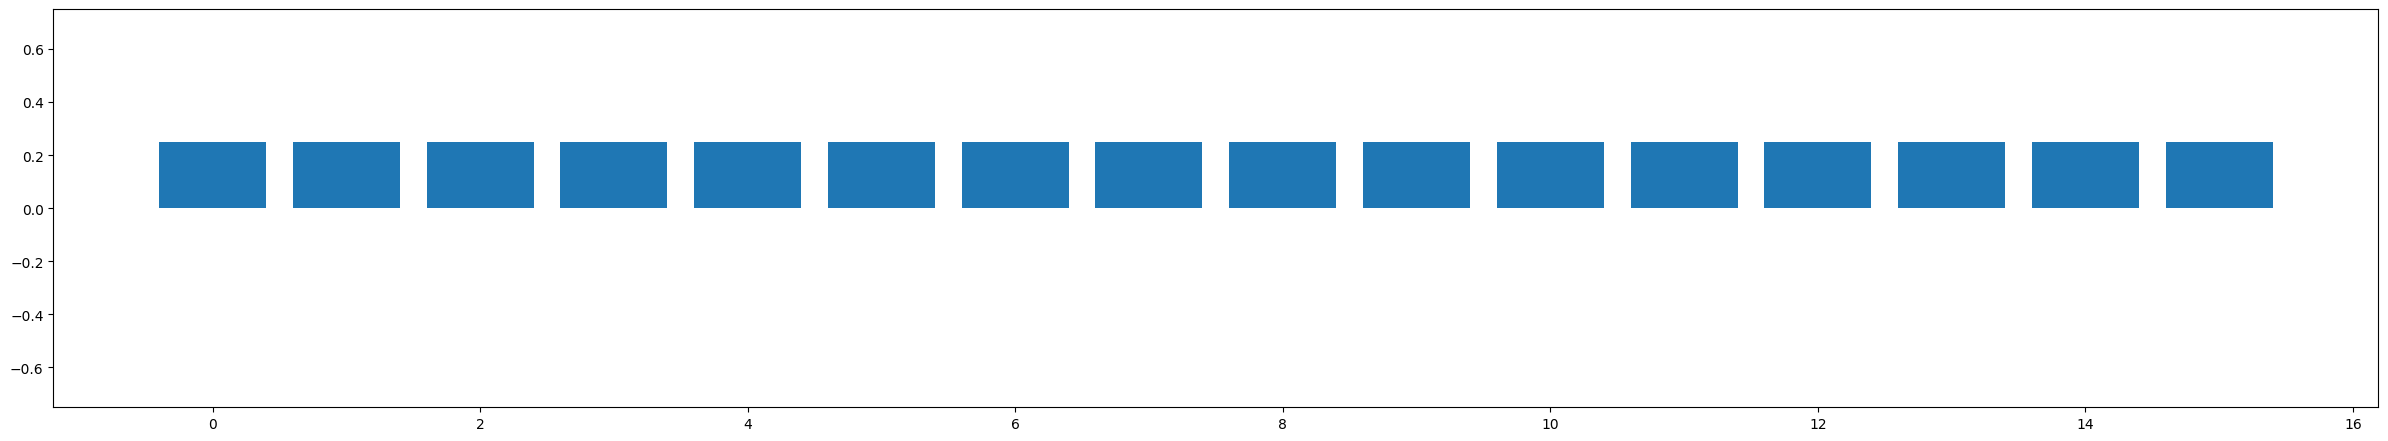

In [55]:
plots = 3
size = 1
#
# Create the initial state and plot it
# 
psi = init()
plot(psi)

[0 0 0 0]
[0 0 0 1]
[0 0 1 0]
[0 0 1 1]
[0 1 0 0]
[0 1 0 1]
[0 1 1 0]
[0 1 1 1]
[1 0 0 0]
[1 0 0 1]
[1 0 1 0]
[1 0 1 1]
[1 1 0 0]
[1 1 0 1]
[1 1 1 0]
[1 1 1 1]


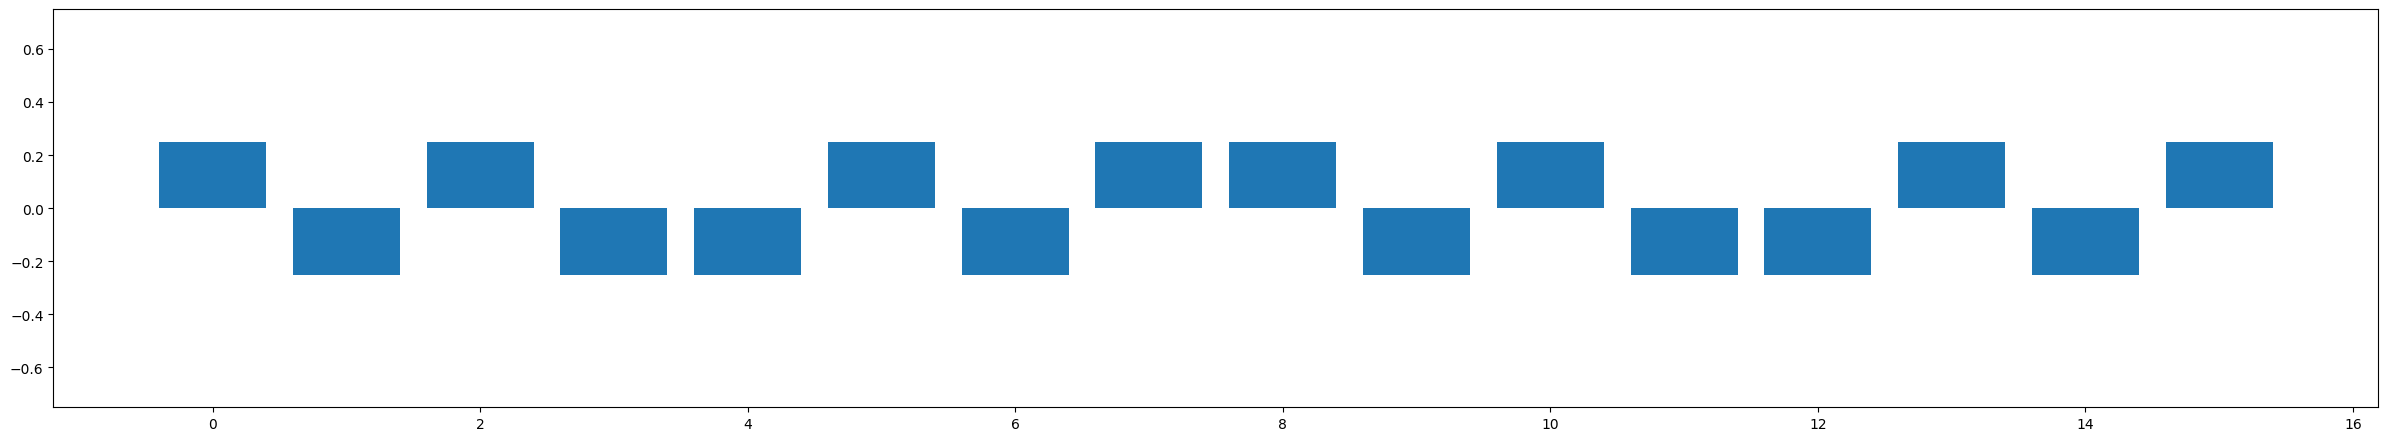

In [56]:
psi = D(Of(psi))

plot(psi)

[0 0 0 0]
[0 0 0 1]
[0 0 1 0]
[0 0 1 1]
[0 1 0 0]
[0 1 0 1]
[0 1 1 0]
[0 1 1 1]
[1 0 0 0]
[1 0 0 1]
[1 0 1 0]
[1 0 1 1]
[1 1 0 0]
[1 1 0 1]
[1 1 1 0]
[1 1 1 1]
[0 0 0 0]
[0 0 0 1]
[0 0 1 0]
[0 0 1 1]
[0 1 0 0]
[0 1 0 1]
[0 1 1 0]
[0 1 1 1]
[1 0 0 0]
[1 0 0 1]
[1 0 1 0]
[1 0 1 1]
[1 1 0 0]
[1 1 0 1]
[1 1 1 0]
[1 1 1 1]
[0 0 0 0]
[0 0 0 1]
[0 0 1 0]
[0 0 1 1]
[0 1 0 0]
[0 1 0 1]
[0 1 1 0]
[0 1 1 1]
[1 0 0 0]
[1 0 0 1]
[1 0 1 0]
[1 0 1 1]
[1 1 0 0]
[1 1 0 1]
[1 1 1 0]
[1 1 1 1]
[0 0 0 0]
[0 0 0 1]
[0 0 1 0]
[0 0 1 1]
[0 1 0 0]
[0 1 0 1]
[0 1 1 0]
[0 1 1 1]
[1 0 0 0]
[1 0 0 1]
[1 0 1 0]
[1 0 1 1]
[1 1 0 0]
[1 1 0 1]
[1 1 1 0]
[1 1 1 1]
[0 0 0 0]
[0 0 0 1]
[0 0 1 0]
[0 0 1 1]
[0 1 0 0]
[0 1 0 1]
[0 1 1 0]
[0 1 1 1]
[1 0 0 0]
[1 0 0 1]
[1 0 1 0]
[1 0 1 1]
[1 1 0 0]
[1 1 0 1]
[1 1 1 0]
[1 1 1 1]
[0 0 0 0]
[0 0 0 1]
[0 0 1 0]
[0 0 1 1]
[0 1 0 0]
[0 1 0 1]
[0 1 1 0]
[0 1 1 1]
[1 0 0 0]
[1 0 0 1]
[1 0 1 0]
[1 0 1 1]
[1 1 0 0]
[1 1 0 1]
[1 1 1 0]
[1 1 1 1]
[0 0 0 0]
[0 0 0 1]
[0 0 1 0]
[0 0 1 1]


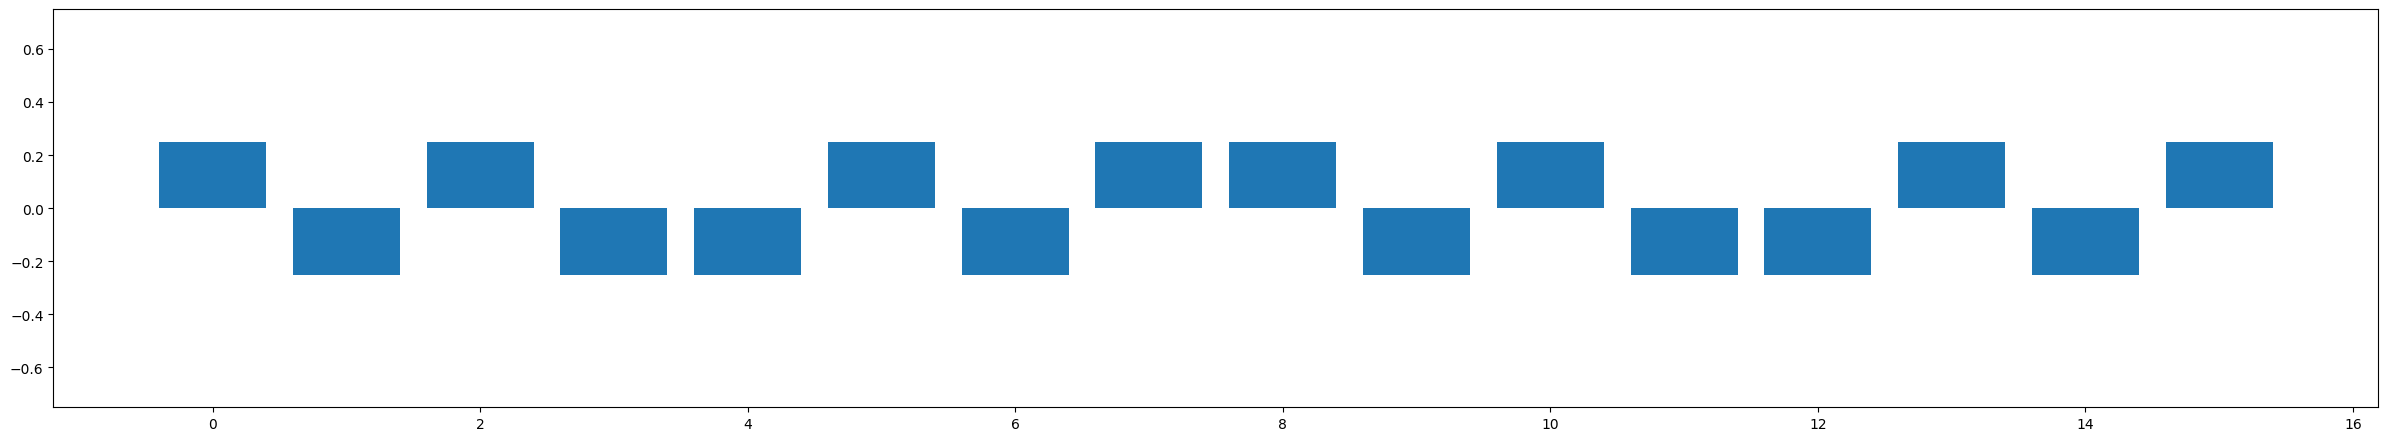

In [60]:
psi = init()
for i in range(7):
    psi = D(Of(psi))

plot(psi)

In [61]:

#
# Now apply a number of iterations of the algorithm and plot the result
#
for i in range(plots):
    psi = D(Of(psi))
    ax = fig.add_subplot(plots+2,1,i+2)
    ax.set_ylim(-size,size)
    plot(ax,psi)

#
# We now reset everything and run the algorithm for a few iterations. We measure the quality of the outcome by
# comparing the absolute value of psi(hit) with the max across all other amplitudes and plot the resulting curve
#
psi = init()
trials = 100
X = np.zeros(trials)
for i in range(trials):
    psi = D(Of(psi))
    check = np.copy(psi)
    check[hit] = 0
    X[i] = abs(psi[hit]) / np.max(abs(check))
ax = fig.add_subplot(plots+2,1,plots+2)
ax.plot(range(trials),X)
#
# Show everything
#
plt.show()

[0 0 0 0]
[0 0 0 1]
[0 0 1 0]
[0 0 1 1]
[0 1 0 0]
[0 1 0 1]
[0 1 1 0]
[0 1 1 1]
[1 0 0 0]
[1 0 0 1]
[1 0 1 0]
[1 0 1 1]
[1 1 0 0]
[1 1 0 1]
[1 1 1 0]
[1 1 1 1]


TypeError: plot() takes 1 positional argument but 2 were given